In [ ]:
import kagglehub

# Download latest version
loveda_path = kagglehub.dataset_download("mohammedjaveed/loveda-dataset")

print("Path to dataset files:", loveda_path)

Path to dataset files: /kaggle/input/loveda-dataset


In [ ]:
import os

def find_all_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            yield os.path.join(root, file)

# Example usage
directory_to_search = loveda_path
for file_path in find_all_files(directory_to_search):
    print(file_path)

Streaming output truncated to the last 5000 lines.
/kaggle/input/loveda-dataset/Train/Train/Rural/masks_png/579.png
/kaggle/input/loveda-dataset/Train/Train/Rural/masks_png/278.png
/kaggle/input/loveda-dataset/Train/Train/Rural/masks_png/927.png
/kaggle/input/loveda-dataset/Train/Train/Rural/masks_png/303.png
/kaggle/input/loveda-dataset/Train/Train/Rural/masks_png/37.png
/kaggle/input/loveda-dataset/Train/Train/Rural/masks_png/231.png
/kaggle/input/loveda-dataset/Train/Train/Rural/masks_png/1048.png
/kaggle/input/loveda-dataset/Train/Train/Rural/masks_png/645.png
/kaggle/input/loveda-dataset/Train/Train/Rural/masks_png/348.png
/kaggle/input/loveda-dataset/Train/Train/Rural/masks_png/449.png
/kaggle/input/loveda-dataset/Train/Train/Rural/masks_png/353.png
/kaggle/input/loveda-dataset/Train/Train/Rural/masks_png/621.png
/kaggle/input/loveda-dataset/Train/Train/Rural/masks_png/148.png
/kaggle/input/loveda-dataset/Train/Train/Rural/masks_png/990.png
/kaggle/input/loveda-dataset/Train/Trai

In [ ]:
import pandas as pd
data = pd.read_csv('/root/.cache/kagglehub/datasets/raddar/chest-xrays-tuberculosis-from-india/versions/1/jaypee_metadata.csv')
data

,study_id,findings
0,TEST_nx1.jpg,False
1,TEST_nx10.jpg,False
2,TEST_nx11.jpg,False
3,TEST_nx12.jpg,False
4,TEST_nx13.jpg,False
...,...,...
150,TRAIN_px52.jpg,Tuberculosis
151,TRAIN_px6.jpg,Tuberculosis
152,TRAIN_px7.jpg,Tuberculosis
153,TRAIN_px8.jpg,Tuberculosis


In [ ]:
import os
import shutil
import pandas as pd

# Paths
csv_file_path = "/root/.cache/kagglehub/datasets/raddar/chest-xrays-tuberculosis-from-india/versions/1/jaypee_metadata.csv"  # Path to your CSV file
image_folder = "/root/.cache/kagglehub/datasets/raddar/chest-xrays-tuberculosis-from-india/versions/1/images/images"  # Path to the folder containing images
output_folder_healthy = "/content/Normal"
output_folder_tuberculosis = "/content/Tuberculosis"

# Create destination folders if they don't exist
os.makedirs(output_folder_healthy, exist_ok=True)
os.makedirs(output_folder_tuberculosis, exist_ok=True)

# Load the CSV file
df = pd.read_csv(csv_file_path)

# Iterate through the DataFrame and copy images to corresponding folders
for _, row in df.iterrows():
    image_name = row['study_id']  # Column containing image names
    label = row['findings']           # Column containing labels ('Healthy' or 'Tuberculosis')

    # Source image path
    source_path = os.path.join(image_folder, image_name)

    # Destination path based on the label
    if label == 'False':
        dest_path = os.path.join(output_folder_healthy, image_name)
    elif label == 'Tuberculosis':
        dest_path = os.path.join(output_folder_tuberculosis, image_name)
    else:
        print(f"Unknown label {label} for image {image_name}. Skipping...")
        continue

    # Copy the image
    shutil.copy(source_path, dest_path)

print("Images successfully organized into folders!")


Images successfully organized into folders!


In [ ]:
import os

def count_files(folder_path):
    count = 0
    for _, _, files in os.walk(folder_path):
        count += len(files)
    return count

folder_path = '/content/Tuberculosis'
file_count = count_files(folder_path)
print("Number of files:", file_count)

Number of files: 78


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns


data_dir = {
    "healthy": "/root/.cache/kagglehub/datasets/pranavraikokte/covid19-image-dataset/versions/2/Covid19-dataset/train/Normal",
    "covid-19": "/root/.cache/kagglehub/datasets/pranavraikokte/covid19-image-dataset/versions/2/Covid19-dataset/train/Covid",
    "pneumonia": "/root/.cache/kagglehub/datasets/pranavraikokte/covid19-image-dataset/versions/2/Covid19-dataset/train/Viral Pneumonia",
    "tuberculosis": "/content/Tuberculosis"
}

IMG_SIZE = (128, 128)
LIMIT = 70
CLASSES = list(data_dir.keys())


def load_images(data_dir, limit=LIMIT):
    images, labels = [], []
    for label, path in data_dir.items():
        count = 0
        for file in os.listdir(path):
            if count >= limit:
                break
            try:
                img = load_img(os.path.join(path, file), target_size=IMG_SIZE)
                img = img_to_array(img) / 255.0  # Normalize
                images.append(img)
                labels.append(CLASSES.index(label))
                count += 1
            except Exception as e:
                print(f"Error loading image {file}: {e}")
    return np.array(images), np.array(labels)


images, labels = load_images(data_dir)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# encoding
y_train = np.eye(len(CLASSES))[y_train]
y_test = np.eye(len(CLASSES))[y_test]

In [ ]:
# Step 1: Build the Model
def build_model(input_shape=(128, 128, 3), num_classes=4):
    model = Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D(pool_size=(2, 2)),
      Flatten(),
      Dense(128, activation='relu'),
      Dropout(0.5),
      Dense(len(CLASSES), activation='softmax')
    ])
    return model

# Step 2: Compile the Model
chest_model = build_model()
chest_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = chest_model.fit(X_train, y_train, epochs=15, validation_split=0.2, batch_size=16)
print(chest_model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 519ms/step - accuracy: 0.2648 - loss: 1.7827 - val_accuracy: 0.8222 - val_loss: 1.2513
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 378ms/step - accuracy: 0.6771 - loss: 1.1168 - val_accuracy: 0.8222 - val_loss: 0.5680
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 455ms/step - accuracy: 0.8135 - loss: 0.5390 - val_accuracy: 0.8889 - val_loss: 0.3909
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 464ms/step - accuracy: 0.8811 - loss: 0.3529 - val_accuracy: 0.8667 - val_loss: 0.3879
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 366ms/step - accuracy: 0.8956 - loss: 0.2615 - val_accuracy: 0.8444 - val_loss: 0.4908
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 701ms/step - accuracy: 0.9474 - loss: 0.1816 - val_accuracy: 0.9111 - val_loss: 0.3388
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 356ms/step - accuracy: 0.9578 - loss: 0.1089 - val_accuracy: 0.9111 - val_loss: 0.2831
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 456ms/step - accuracy: 0.9747 - loss: 0.0854 - val_accuracy: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,178,510 (84.60 MB)

 Trainable params: 7,392,836 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,785,674 (56.40 MB)

None


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8973 - loss: 0.5301
Test Accuracy: 0.8928571343421936


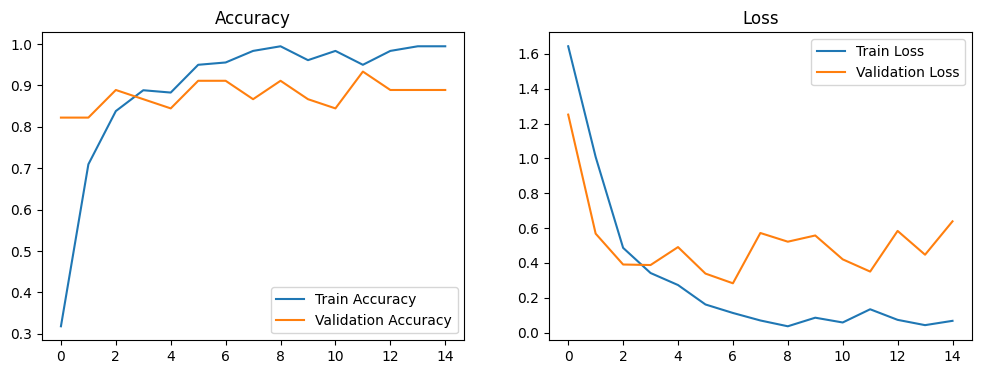

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


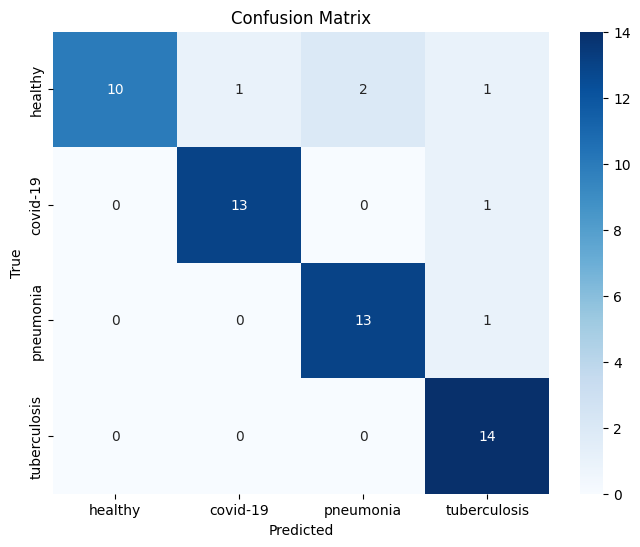

Classification Report:
              precision    recall  f1-score   support

     healthy       1.00      0.71      0.83        14
    covid-19       0.93      0.93      0.93        14
   pneumonia       0.87      0.93      0.90        14
tuberculosis       0.82      1.00      0.90        14

    accuracy                           0.89        56
   macro avg       0.90      0.89      0.89        56
weighted avg       0.90      0.89      0.89        56



In [ ]:
test_loss, test_acc = chest_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

# training accuracy and vali accuracy ploting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

# Predictions on test data
y_pred = chest_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=CLASSES))


In [ ]:
# Testing with new images
def predict_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = chest_model.predict(img_array)
    predicted_class = CLASSES[np.argmax(prediction)]
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

# test_image = "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/Stone- (541).jpg"
# predict_image(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


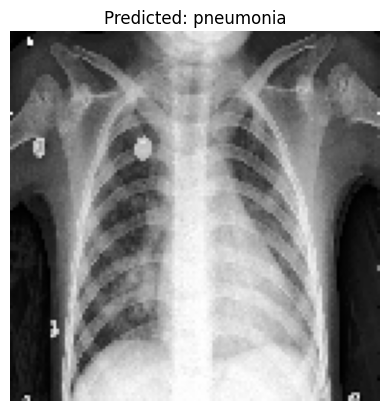

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


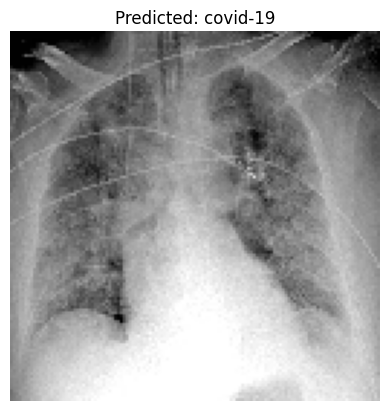

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


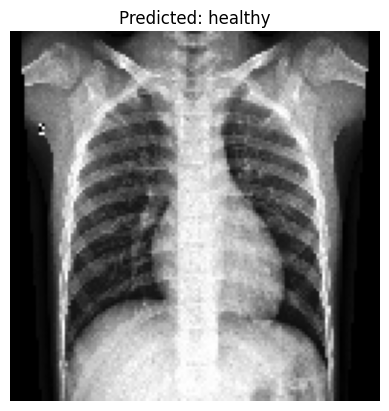

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


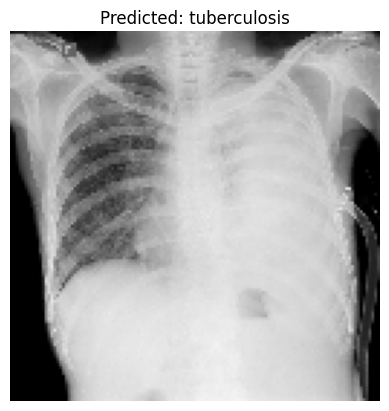

In [ ]:
image_paths = [
    "/root/.cache/kagglehub/datasets/pranavraikokte/covid19-image-dataset/versions/2/Covid19-dataset/train/Viral Pneumonia/046.jpeg",
    "/root/.cache/kagglehub/datasets/pranavraikokte/covid19-image-dataset/versions/2/Covid19-dataset/train/Covid/07.jpg",
    "/root/.cache/kagglehub/datasets/pranavraikokte/covid19-image-dataset/versions/2/Covid19-dataset/train/Normal/059.jpeg",
    "/content/Tuberculosis/TEST_px33.jpg"
]

for image_path in image_paths:
    predict_image(image_path)

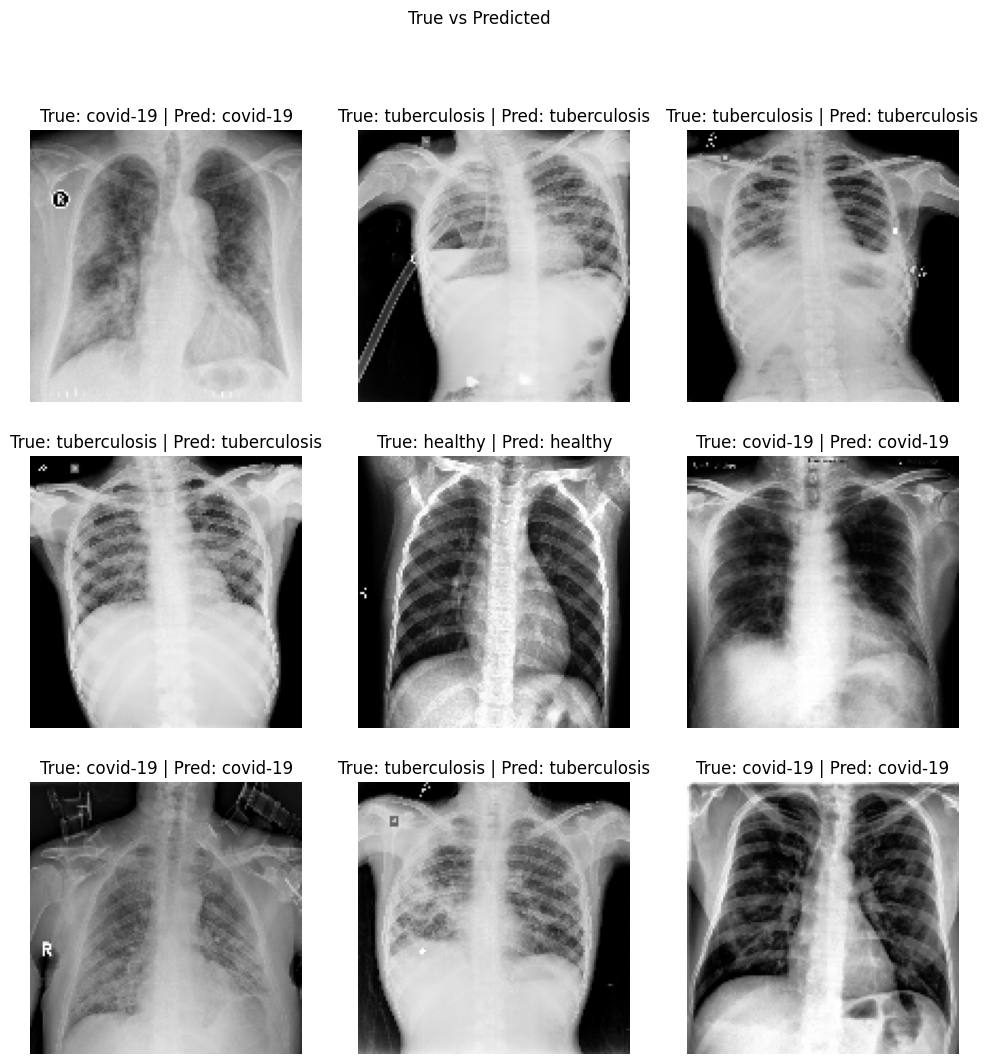

In [ ]:
def plot_predictions(X_test, y_test, y_pred):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    axes = axes.ravel()
    for i in range(9):
        ax = axes[i]
        ax.imshow(X_test[i])
        ax.axis('off')
        ax.set_title(f"True: {CLASSES[np.argmax(y_test[i])]} | Pred: {CLASSES[np.argmax(y_pred[i])]}")
    plt.suptitle("True vs Predicted")
    plt.show()

plot_predictions(X_test, y_test, y_pred)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
import cv2

# Simulate Model Initialization
_ = chest_model.predict(np.zeros((1, 128, 128, 3)))  # Initialize model with dummy data

# Step 3: Grad-CAM Functions
def compute_gradcam(model, img_array, layer_name, class_idx):


    grad_model = Model([model.inputs], [model.get_layer("conv2d_1").output, model.get_layer("dense_1").output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # Global average pooling

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(conv_outputs * pooled_grads, axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU to remove negative values
    heatmap /= np.max(heatmap)  # Normalize to [0, 1]
    return heatmap

def overlay_heatmap(img, heatmap, alpha=0.4, colormap=cv2.COLORMAP_JET):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, colormap)
    overlayed_image = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)
    return overlayed_image

def gradcam_visualization(model, image_path, layer_name='conv2d_1'):
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict class
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions)
    class_label = ["healthy", "covid-19", "pneumonia", "tuberculosis"][class_idx]  # Replace with actual class names

    # Compute Grad-CAM
    heatmap = compute_gradcam(model, img_array, layer_name, class_idx)

    # Load original image
    original_img = cv2.imread(image_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    original_img = cv2.resize(original_img, (128, 128))

    # Overlay heatmap
    overlayed_img = overlay_heatmap(original_img, heatmap)

    # Plot Results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap, cmap='viridis')
    plt.title("Grad-CAM Heatmap")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(overlayed_img)
    plt.title(f"Overlayed - Predicted: {class_label}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# # Step 4: Test Grad-CAM
# test_image = "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1493).jpg"
# gradcam_visualization(chest_model, test_image, layer_name='conv2d_1')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


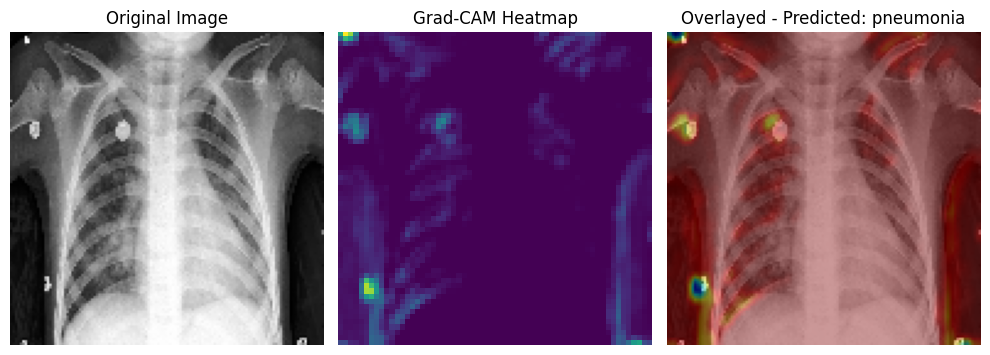

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


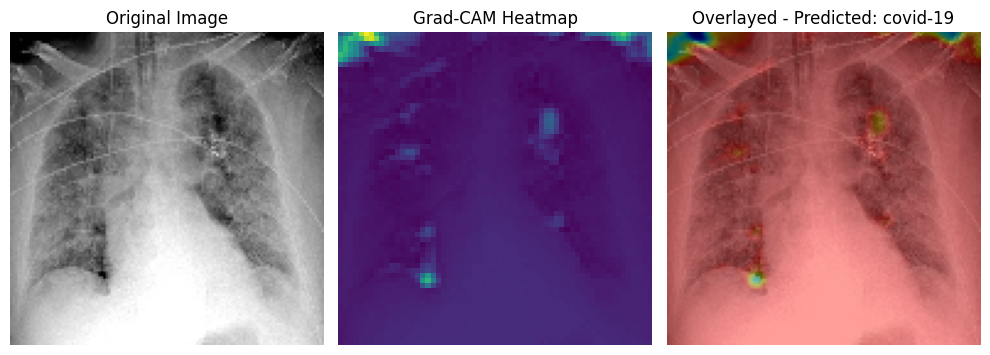

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


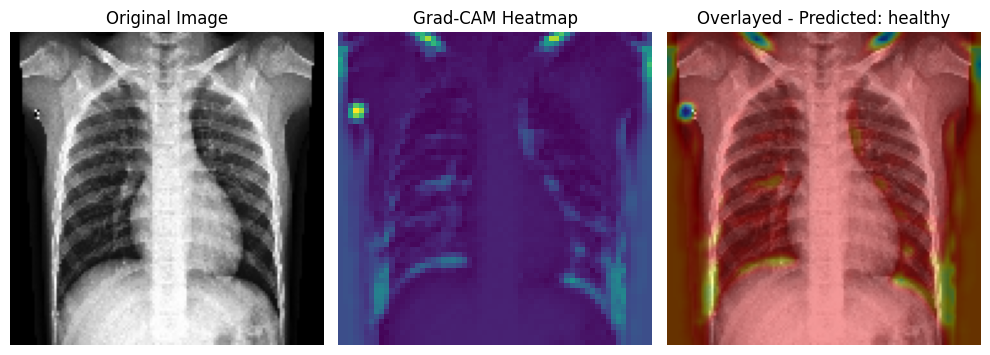

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


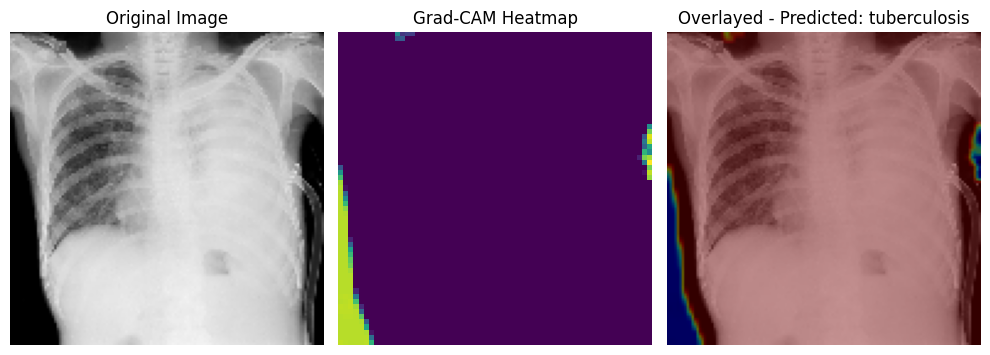

In [ ]:
image_paths = [
    "/root/.cache/kagglehub/datasets/pranavraikokte/covid19-image-dataset/versions/2/Covid19-dataset/train/Viral Pneumonia/046.jpeg",
    "/root/.cache/kagglehub/datasets/pranavraikokte/covid19-image-dataset/versions/2/Covid19-dataset/train/Covid/07.jpg",
    "/root/.cache/kagglehub/datasets/pranavraikokte/covid19-image-dataset/versions/2/Covid19-dataset/train/Normal/059.jpeg",
    "/content/Tuberculosis/TEST_px33.jpg"
]

for image_path in image_paths:
    gradcam_visualization(chest_model, image_path, layer_name='conv2d_1')

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def saliency_map(model, img_path, target_size=(128, 128), class_index=None):
    """
    Generate and display the saliency map of the input image.

    Parameters:
    - model: Trained Keras model.
    - img_path: Path to the input image.
    - target_size: Target image size to resize to (default: (128, 128)).
    - class_index: Target class index for which saliency is computed.
    """
    # Load and preprocess the image
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_array, axis=0), dtype=tf.float32)  # Ensure tf.Tensor

    # Ensure gradients are tracked
    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        if class_index is None:
            class_index = np.argmax(predictions[0])
        print(f"Predicted class: {class_index}")

        # Target output for the chosen class
        target_output = predictions[:, class_index]

    # Calculate gradients
    grads = tape.gradient(target_output, img_tensor)
    grads_abs = tf.abs(grads)  # Use absolute value of gradients
    saliency = np.max(grads_abs, axis=-1)[0]  # Reduce across color channels

    # Visualize the saliency map
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')

    # Saliency Map
    plt.subplot(1, 2, 2)
    plt.imshow(saliency, cmap='jet')
    plt.title(f"Saliency Map (Class: {class_index})")
    plt.axis('off')

    plt.show()

# test_image_path = "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1493).jpg"
# saliency_map(chest_model, test_image_path)


Predicted class: 2


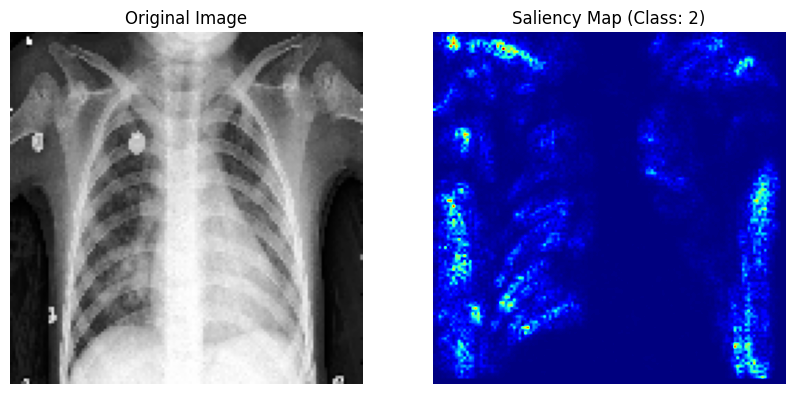

Predicted class: 1


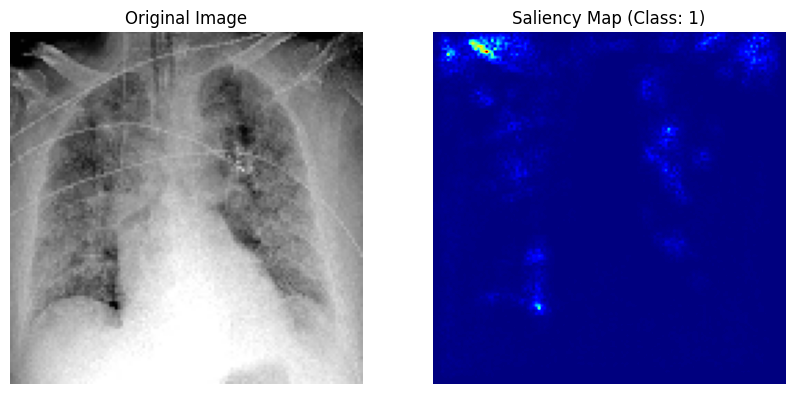

Predicted class: 0


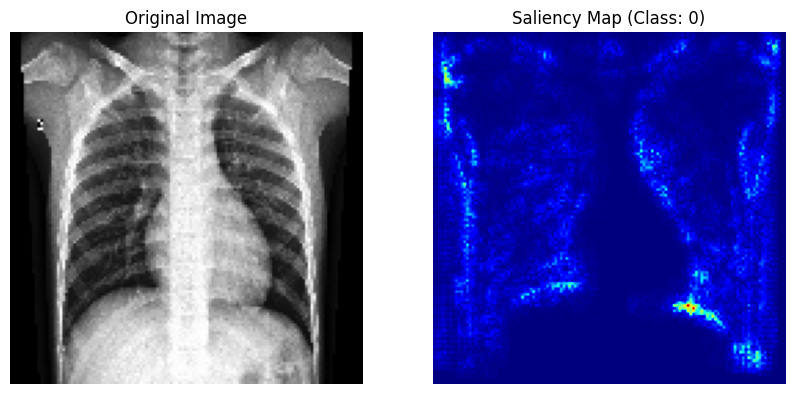

Predicted class: 3


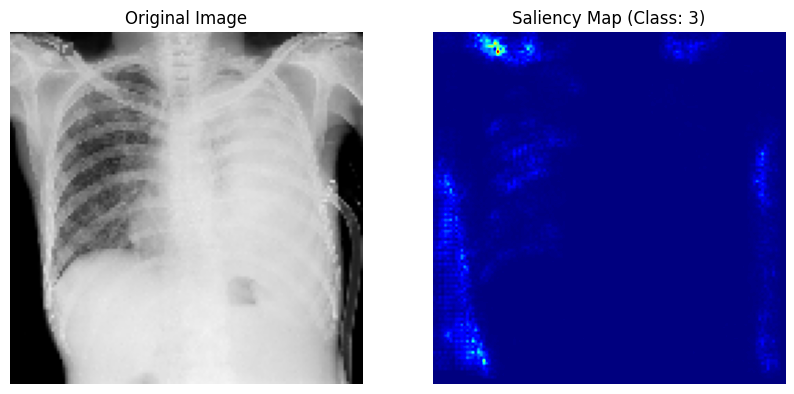

In [ ]:
image_paths = [
    "/root/.cache/kagglehub/datasets/pranavraikokte/covid19-image-dataset/versions/2/Covid19-dataset/train/Viral Pneumonia/046.jpeg",
    "/root/.cache/kagglehub/datasets/pranavraikokte/covid19-image-dataset/versions/2/Covid19-dataset/train/Covid/07.jpg",
    "/root/.cache/kagglehub/datasets/pranavraikokte/covid19-image-dataset/versions/2/Covid19-dataset/train/Normal/059.jpeg",
    "/content/Tuberculosis/TEST_px33.jpg"
]

for image_path in image_paths:
    saliency_map(chest_model, image_path)

In [ ]:
# Save the trained model
model_save_path = 'chest_disease_classification_model.h5'
chest_model.save(model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to chest_disease_classification_model.h5
